<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  708 non-null    object 
 1   Gender                      708 non-null    object 
 2   Study_Hours_per_Week        708 non-null    int64  
 3   Attendance_Rate             708 non-null    float64
 4   Past_Exam_Scores            708 non-null    int64  
 5   Parental_Education_Level    708 non-null    object 
 6   Internet_Access_at_Home     708 non-null    object 
 7   Extracurricular_Activities  708 non-null    object 
 8   Final_Exam_Score            708 non-null    int64  
 9   Pass_Fail                   708 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 55.4+ KB


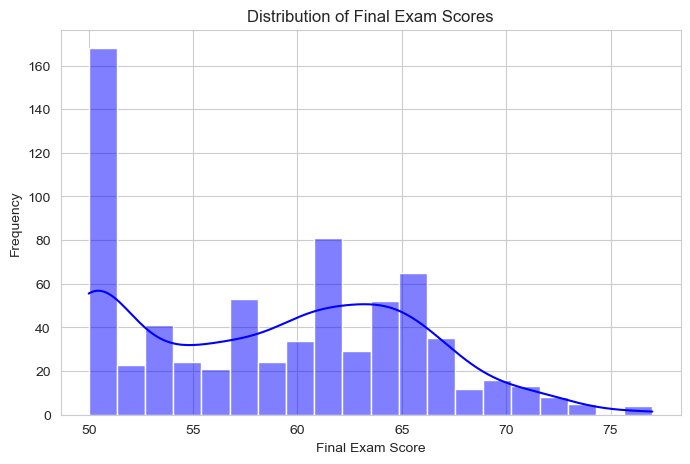

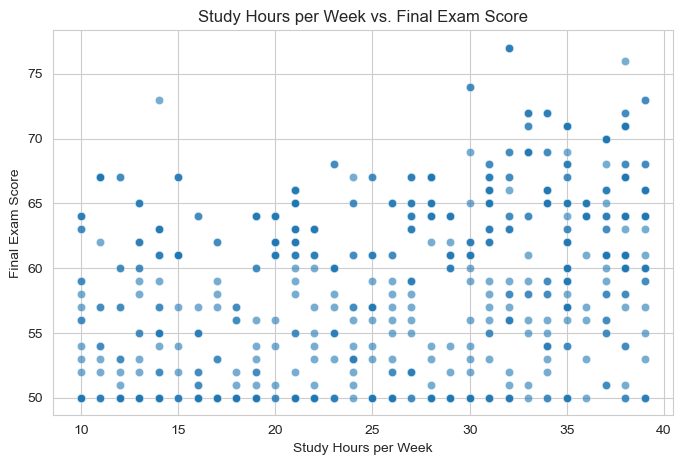

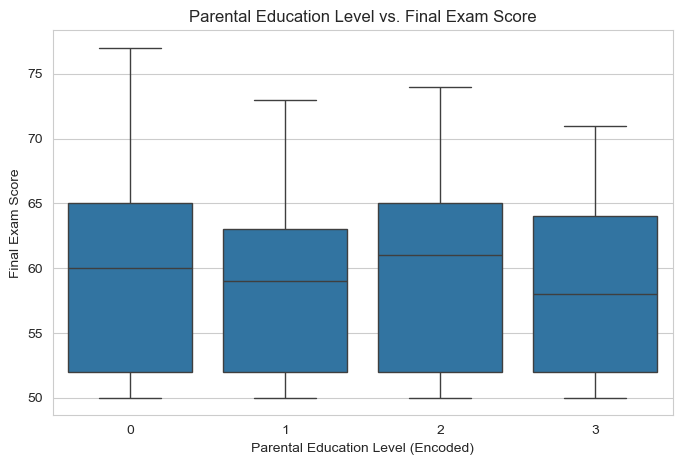

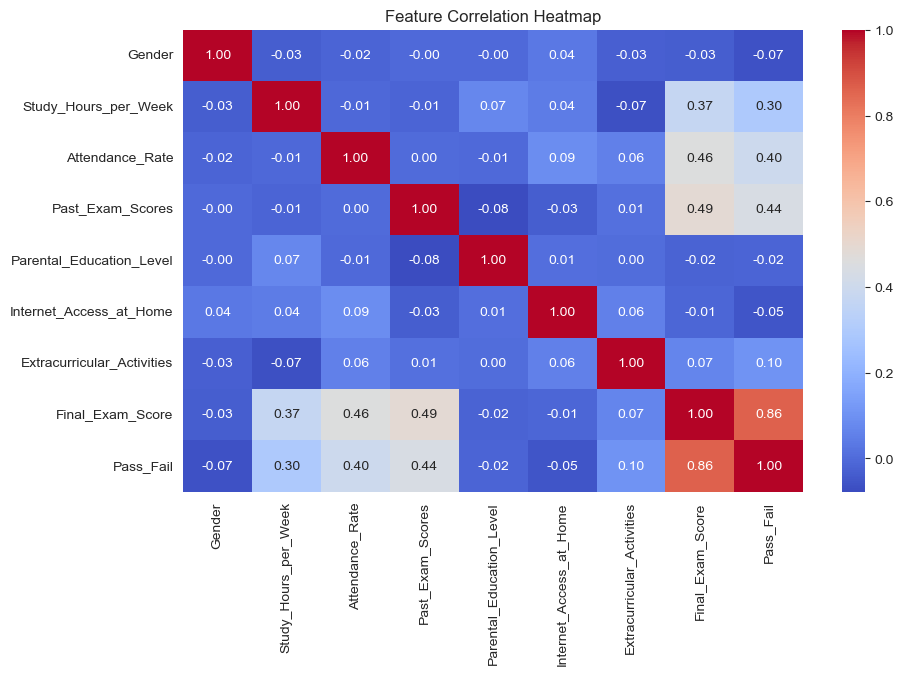

(6.676731233040377, 0.8430665368310071)

In [17]:
import pandas as pd

# Load the dataset
df = pd.read_csv('student_performance_dataset.csv')

# Display basic information and first few rows
df.info(), df.head()

from sklearn.preprocessing import LabelEncoder

# Drop the Student_ID column
df = df.drop(columns=["Student_ID"])

# Encode categorical variables
categorical_columns = ["Gender", "Parental_Education_Level", "Internet_Access_at_Home", 
                       "Extracurricular_Activities", "Pass_Fail"]

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Display the first few rows after encoding
df.head()

import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Histogram of Final Exam Score
plt.figure(figsize=(8, 5))
sns.histplot(df["Final_Exam_Score"], bins=20, kde=True, color="blue")
plt.title("Distribution of Final Exam Scores")
plt.xlabel("Final Exam Score")
plt.ylabel("Frequency")
plt.show()

# Scatter plot: Study Hours vs. Final Exam Score
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Study_Hours_per_Week"], y=df["Final_Exam_Score"], alpha=0.6)
plt.title("Study Hours per Week vs. Final Exam Score")
plt.xlabel("Study Hours per Week")
plt.ylabel("Final Exam Score")
plt.show()

# Boxplot: Parental Education Level vs. Final Exam Score
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Parental_Education_Level"], y=df["Final_Exam_Score"])
plt.title("Parental Education Level vs. Final Exam Score")
plt.xlabel("Parental Education Level (Encoded)")
plt.ylabel("Final Exam Score")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target variable
X = df.drop(columns=["Final_Exam_Score"])
y = df["Final_Exam_Score"]

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2